In [25]:
import pandas as pd
import numpy as np 
from statsbombpy import sb
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(r'data/freekick_pass_shot.csv', encoding = 'latin1')

C:\Users\Aqsone\AppData\Local\Temp\ipykernel_32032\1827319829.py:1: DtypeWarning: Columns (0,2,3,4,5,6,8,9,10,11,12,13,15,17,18,24,26,27,28,33,36,39,45,46,50,53,98,99,102,103,108,114,117) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'data/freekick_pass_shot.csv', encoding = 'latin1')


In [3]:
df[['x', 'y']] = df['location'].str.extract(r'\[(.*), (.*)\]').astype(float)

In [5]:
df['y_symetric'] = [(80-df['y'][i]) if df['y'][i] < 40 else df['y'][i] for i in range(len(df))]

In [6]:
df['pass_shot_assist'].value_counts()

pass_shot_assist
True    2689
Name: count, dtype: int64

2689


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_32032\1327106222.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


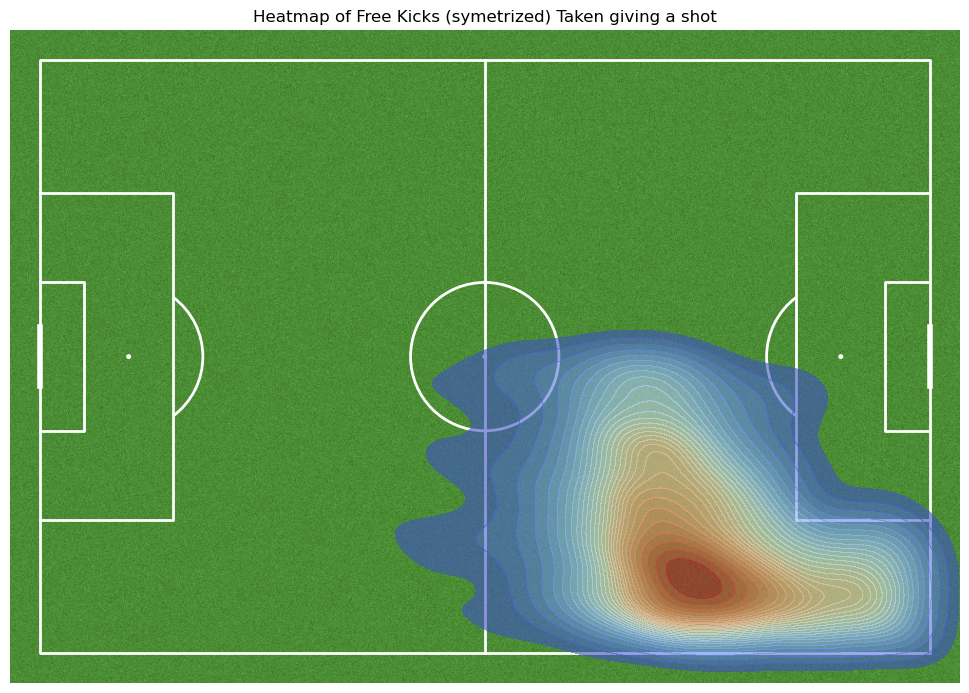

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = df[(df['pass_type'] == 'Free Kick') & (df['pass_shot_assist']==True)]
print(len(sub_df))
# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y_symetric'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of Free Kicks (symetrized) Taken giving a shot')
plt.show()

9889


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_32032\1786696456.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


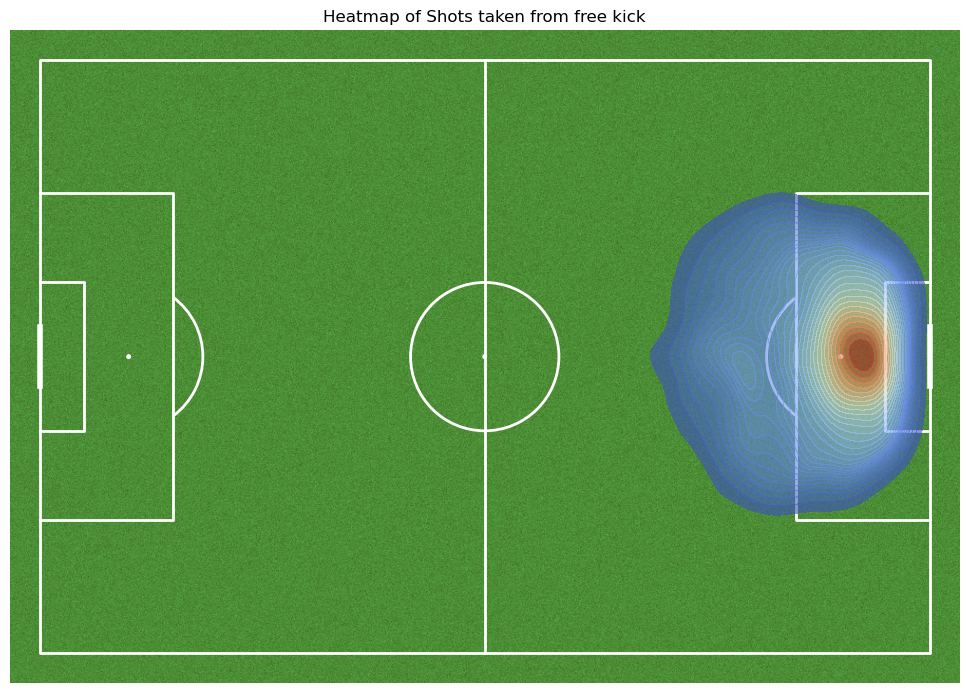

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = df[(df['type'] == 'Shot')]
print(len(sub_df))

# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of Shots taken from free kick')
plt.show()

1009


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_32032\1905901487.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


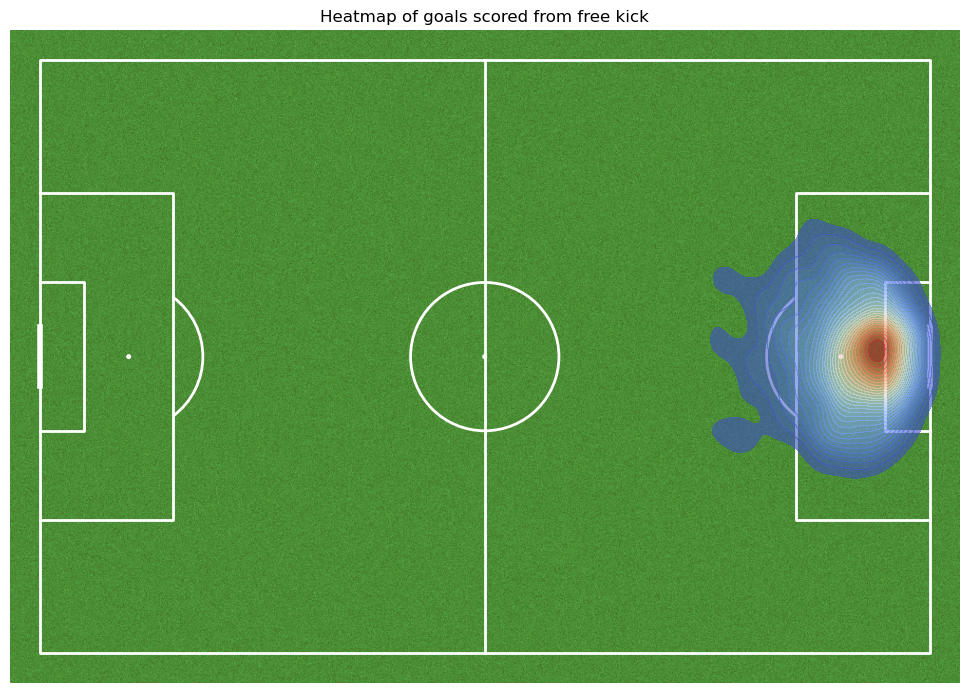

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = df[(df['type'] == 'Shot') & (df['shot_outcome'] == 'Goal')]
print(len(sub_df))
# Set up the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot the heatmap
sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

In [14]:
def sanitize_rel_events(event):
    
    if pd.isna(event):
        return []
    
    if len(event) > 40:
        clean_event = event[1:-1].replace("'", "").replace(" ", "").split(',')
    else : 
        clean_event = [event[1:-1]]
    
    return clean_event

df['related_events'].astype(str).replace('nan', '')
df['related_events_clean'] = df['related_events'].apply(sanitize_rel_events)

In [15]:
shots_from_fk = []
for i in tqdm(range(len(df))):
    if (df['pass_type'][i] == 'Free Kick'):
        rel_shot = df['pass_assisted_shot_id'][i] 
        if pd.notna(rel_shot):
            shots_from_fk.append(rel_shot)

print("Number of Shots taken from a Pass Free Kick :", len(shots_from_fk))

100%|██████████| 107671/107671 [00:00<00:00, 189019.14it/s]

Number of Shots taken from a Pass Free Kick : 2975


2975


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_32032\393560232.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


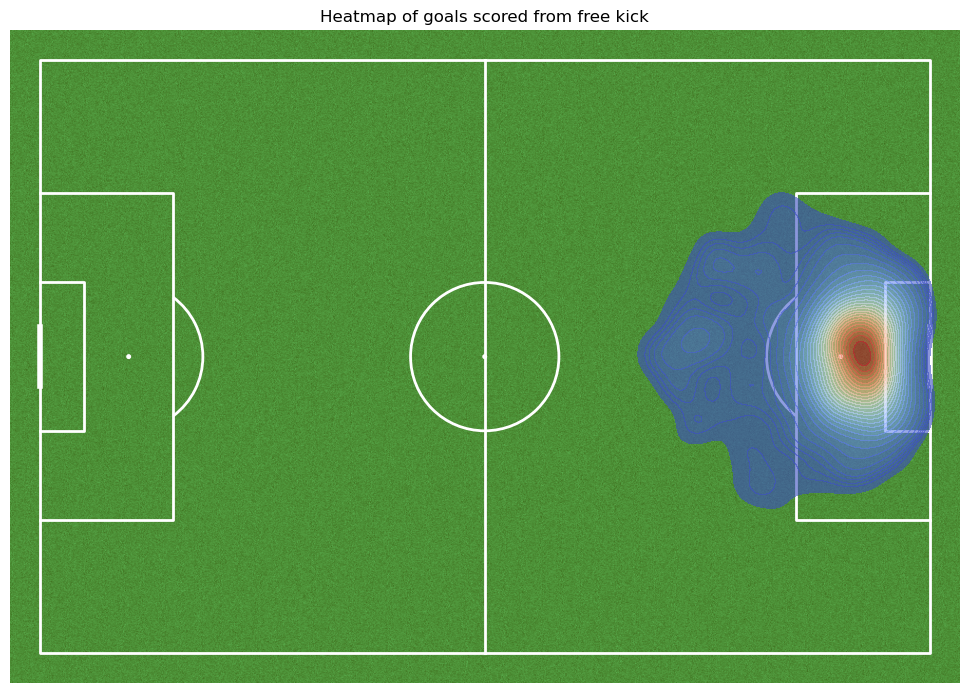

In [16]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = df[df['id'].isin(shots_from_fk)]
print(len(sub_df))

fig, ax = pitch.draw(figsize=(10, 7))

kde = sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y'], 
    shade=True, 
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='shot_statsbomb_xg', ylabel='Count'>

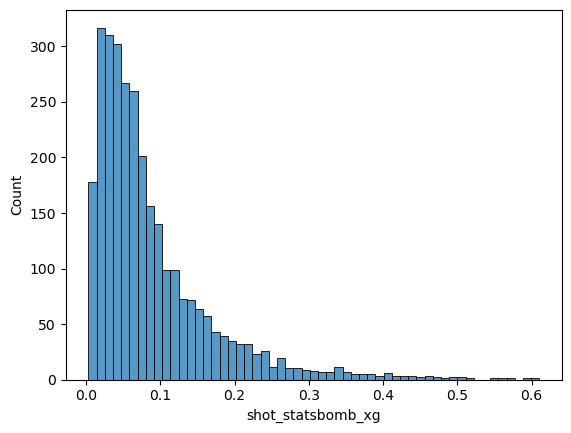

In [17]:
sub_df = df[df['id'].isin(shots_from_fk)]
sns.histplot(sub_df['shot_statsbomb_xg'])

2975


C:\Users\Aqsone\AppData\Local\Temp\ipykernel_32032\593347384.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Aqsone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


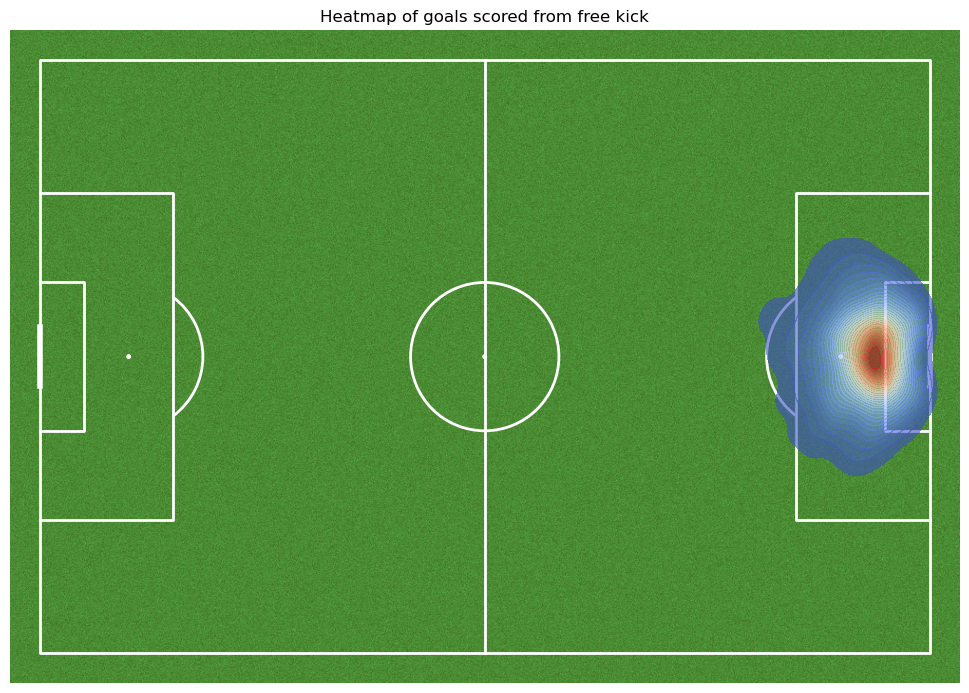

In [18]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
sub_df = df[df['id'].isin(shots_from_fk)].reset_index(drop = True)
print(len(sub_df))

fig, ax = pitch.draw(figsize=(10, 7))

kde = sns.kdeplot(
    x=sub_df['x'], 
    y=sub_df['y'], 
    shade=True, 
    weights=sub_df['shot_statsbomb_xg'],
    cmap='coolwarm', 
    n_levels=30, 
    alpha=0.6, 
    ax=ax
)

plt.title('Heatmap of goals scored from free kick')
plt.show()

In [19]:
import plotly.graph_objects as go
from plotly_football_pitch import (
    make_pitch_figure,
    PitchDimensions,
    SingleColourBackground
)


dimensions = PitchDimensions(pitch_width_metres=80, pitch_length_metres=120)

fig = make_pitch_figure(
    dimensions,
    pitch_background=SingleColourBackground("#3ab54a"),

)

shots = go.Scatter(
        x=sub_df['x'],
        y=sub_df['y'],
        mode="markers",
        marker={"size": 2 + 30*sub_df['shot_statsbomb_xg'], "color": "red"},
        hovertext=sub_df['shot_statsbomb_xg'],
        showlegend=False,
    )

fig.add_trace(shots)

fig.update_layout(height = 850, width = 1200, title="Scatter plot of shots with size corresponding to xG")
fig.show()

In [20]:
from scipy.spatial import distance
import ast
import math

sub_df['float_location'] = [ast.literal_eval(sub_df['location'][i]) for i in range(len(sub_df))]

goal_loc = [120, 40]
sub_df['distance_to_goal'] = [distance.euclidean(sub_df['float_location'][i], goal_loc) for i in range(len(sub_df))]

def calculate_angle(point1, point2):
    delta_y = point2[1] - point1[1]
    delta_x = point2[0] - point1[0]
    angle = math.atan2(delta_y, delta_x)
    angle_degrees = math.degrees(angle)

    if angle_degrees < 0:
        angle_degrees += 360
        
    if angle_degrees > 180:
        angle_degrees = 360 - angle_degrees
        
    return angle_degrees

sub_df['angle_shot'] = [calculate_angle(sub_df['float_location'][i], goal_loc) for i in range(len(sub_df))]

In [21]:
sub_df['shot_outcome'].value_counts()

shot_outcome
Off T               1214
Saved                672
Blocked              481
Goal                 286
Wayward              225
Post                  66
Saved Off Target      20
Saved to Post         11
Name: count, dtype: int64

In [26]:
fig = px.scatter(sub_df, 
                 x="distance_to_goal", 
                 y="shot_statsbomb_xg", 
                 color="shot_outcome",
                )

fig.update_layout(title = "Expected Goals in function of Distance to goal")
fig.show()

In [27]:
fig = px.scatter(sub_df, 
                 x="angle_shot", 
                 y="shot_statsbomb_xg", 
                 color="shot_outcome",
                )

fig.update_layout(title = "Expected Goals in function of Distance to goal")
fig.show()